In [979]:
import numpy as np
import matplotlib.pyplot as plt
import math

Dynamique de température d'une salle informatique

I) modèle de l'ordinateur

Le but de cette partie est de modéliser la chaleure dégagée par un ordinateur. On suppose ici que le pc possède une unité centrale dont on précisera les dimenssions. De plus, les composants et leurs capacités sont également choisis au préalable. L'unité centrale ainsi que tout les composants sont considéré comme en acier. Enfin on posera que les épaisseur des boitier des composants est la même pour tous et de 5*10^(-3) m

Tout d'abord, commençons par trouver les variation de températures de l'air dans l'unité centrale qui est initialement à température ambiante.
On utilisera la formule T(t) = T(composant) + (T0 - T(composant))*exp((-h*S/(m*Cp))*t) où h est le coefficient d'échange, S est la surface de contacte, m est la masse et Cp est la chaleur massique à pression constante. On supposera de plus qu'une homogénéisation de l'air se fait en 10 secondes.

In [980]:
# "a", alimentation
# "c", carte graphique
# "p", processeur
# "d", disque dur
# "r", RAM
# "cm", carte mère

Vu = 0.024276 # volume de l'unité centrale en m^3

Tamb = 291.15 # température ambiante en Kelvin

T = {"a":328.15,
     "d":296.15,
     "r":291.65,
     "cm":307.15} # températures des composants en K

S = {"a":0.0425,
     "d":0.0356,
     "r":0.01115,
     "cm":0.0576} # surfaces de contactes composants/air en m^2

M = {"a":3.62,
     "c":0.591,
     "p":0.023,
     "d":0.73,
     "r":0.12,
     "cm":0.56} # masses composants en Kg

C = {"a":435*M["a"],
     "c":435*M["c"],
     "p":435*M["p"],
     "d":435*M["d"],
     "r":435*M["r"],
     "cm":435*M["cm"]} # capacités calorifiques composants = masse*chaleur massique acier à pression constante en J/K

E = {"a":T["a"]*C["a"],
     "d":T["d"]*C["d"],
     "r":T["r"]*C["r"],
     "cm":T["cm"]*C["cm"]} # énergie des composants = température*capacité calorifiques en J

Mair = 1.225*(Vu-0.002412) # ro*Vair = ro*(V(unité centrale) - V(composants)) en kg

Cpair = 1005 # chaleur massique de l'air à pression constante en J/(kg*K)

Tf = (T["a"]+T["d"]+T["r"]+T["cm"])/len(T) # température finale de l'air dans l'unité centrale en K

tmax = 30

In [981]:
Tf

305.775

In [982]:
def temp_air(T, S, Tamb, Mair, Cpair, t):
    """
    dict[str:Number]^2*Number^4*int -> Number
    rend la température de l'air de l'unité centrale à un instant t
    """
    T0 = Tamb
    h = {"a":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["a"]*math.fabs(T0-T["a"])*2),
         "d":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["d"]*math.fabs(T0-T["d"])*2),
         "r":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["r"]*math.fabs(T0-T["r"])*2),
         "cm":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["cm"]*math.fabs(T0-T["cm"])*2)}
    s = 0
    for i in range(0,t+1,2) :
        for j in S :
            s += math.exp((-h[j]*S[j]*i)/(Mair*Cpair))*(Tamb-T[j])+T[j]
            h[j] = (math.fabs(Tf-Tamb)*Cpair*Mair)/(S[j]*math.fabs(T0-T[j])*2)
        T0 = s/len(S)
        s = 0
    return T0

In [983]:
temp_air(T, S, Tamb, Mair, Cpair,0)

291.15

In [984]:
def temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
    """
    dict[str:Number]^2*Number^5 -> Number
    rend la température de l'air de l'unité centrale pour tout instant t
    """
    TT = []
    for i in range(0,tmax+1,2) :
        TT.append((i,temp_air(T, S, Tamb, Mair, Cpair, i)))
    return TT

In [985]:
temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax)

[(0, 291.15),
 (2, 297.8744935986167),
 (4, 300.9327458790016),
 (6, 303.56806200870193),
 (8, 304.69628151304914),
 (10, 305.3023548921189),
 (12, 305.5553910251458),
 (14, 305.6701598584791),
 (16, 305.72281585965266),
 (18, 305.7484886228026),
 (20, 305.7613794786322),
 (22, 305.76796322590815),
 (24, 305.771353691368),
 (26, 305.77310742390375),
 (28, 305.774016761198),
 (30, 305.7744889137909)]

In [986]:
def list_temps(T, S, Tamb, Mair, Cpair, tmax):
    """
    """
    L = []
    for i in temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T(T, S, Tamb, Mair, Cpair, tmax):
    """
    """
    L = []
    for i in temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
        a,b = i
        L.append(b)
    return L
L1 = list_temps(T, S, Tamb, Mair, Cpair, tmax)
L2 = list_T(T, S, Tamb, Mair, Cpair, tmax)

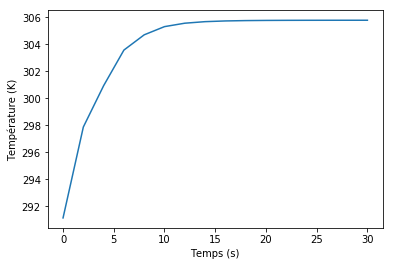

In [987]:
def plot_Temp(L1,L2):
    '''
    rend la courbe de l'évolution de la température au cours du temps
    '''
    plt.figure()
    plt.plot(L1,L2)
    plt.ylabel("Température (K)")
    plt.xlabel("Temps (s)")
    plt.show()
    return

plot_Temp(L1,L2)

On remarque qu'avec les valeurs de températures qui montre une utilisation assez poussé de l'ordinateur, la température de l'air a l'intérieur de celui-ci croit très rapidement.

A présent, on va faire évoluer le modèle en posant que le pc vient de s'allumer et que la température des composants évolue au cours du temps. pour celà on utilise un modèle vu en physique au S1 où l'on étudie la température d'un processeur lorsqu'il est refroidi ou non. On peut alors appliquer ce modèle aux autres composants qui chauffent car ils fonctionnent de la même manière. Pour celà nous aurons besoin de la puissance apporté a chaque composants (P), de la température fournie par le ventilateur que l'on supose constante et égale à 291.15 K, de la resistence thermique (R) du dissipateur qui est supposé le même pour tout les composants, ainsi que de la capacité calorifique du processeur c'est à dire de l'acier, puisque les composants sont posé comme étant en acier.

In [988]:
# "a", alimentation
# "c", carte graphique
# "p", processeur
# "d", disque dur
# "r", RAM
# "cm", carte mère
 
Vu = 0.024 # volume de l'unité centrale en m^3

Vair = Vu - 0.002412 # volume air = volume unité centrale - volume composants

Tamb = 291.15 # température ambiante en Kelvin

Ralu = 0.35 # résistence thermique de l'aluminium en K/W

Rair = 0.11 # résistence thermique de l'air en K/W

Cpalu = 897 # chaleur massique de l'aluminium à pression constante en J/(kg*K)

M = {"a":3.62,
     "c":0.023,
     "p":0.023,
     "d":0.73,
     "r":0.12,
     "cm":0.56} # masses composants en Kg

C = {"a":435*M["a"],
     "c":435*M["c"],
     "p":435*M["p"],
     "d":435*M["d"],
     "r":435*M["r"],
     "cm":435*M["cm"]} # capacités calorifiques composants = masse*chaleur massique acier à pression constante en J/K

Malu = {"p":0.15,
        "a":0.13,
        "c":0.084} # masse des dissipateur en kg

Calu = {"p":897*Malu["p"],
        "a":897*Malu["a"],
        "c":897*Malu["c"]} # capacité calorifique des dissipateur

Mvent = {"p":1.225*7.41*10**(-3)*2,
        "a":1.225*9.91*10**(-3)*2,
        "c":1.225*8.64*10**(-3)*2} # masse de l'air brassé par les ventilateurs en kg

Scomp_air = {"a":0.0425,
     "d":0.0356,
     "r":0.01115,
     "cm":0.0576} # surfaces de contactes composants/air en m^2

Scomp_dis = {"p":0.0025,
            "a":0.00345,
            "c":0.0048} # surfaces de contactes composants/dissipateurs en m^2

Sdis_vent = {"p":0.04005,
            "a":0.2763,
            "c":0.03936} # surfaces de contactes dissipateurs/air en m^2



Mair = 1.225*(Vu-0.002412) # ro*Vair = ro*(V(unité centrale) - V(composants)) en kg

Cpair = 1005 # chaleur massique de l'air à pression constante en J/(kg*K)

tmax = 12 # temps en s

In [989]:
def temp_comp_dis(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, t) :
    """
    dict[str:Number]^6*Number^6 -> tuple[dict[str:Number],dict[str:number]]
    rend la température des composants ainsi que celle des dissipateurs à un instant t
    """
    
    P = {"a":np.random.randint(80, 100 + 1),
     "c":np.random.randint(75, 95 + 1),
     "p":np.random.randint(45, 60 + 1),
     "d":np.random.randint(8, 15 + 1),
     "r":1,
     "cm":np.random.randint(20, 35 + 1)} # puissance apportés aux composants en W
    
    if t == 0 :
        return ({"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}, {"p":Tamb,
            "a":Tamb,
            "c":Tamb})
    else :
        Keys = ["d", "r", "cm"]
        
        Tair = Tamb
        
        hcomp_dis = {"p":0,
            "a":0,
            "c":0}
        
        Tdis = {"p":Tamb,
            "a":Tamb,
            "c":Tamb}
        
        Tcomp = {"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}
        
        Tvent = {"p":Tair,
            "a":Tair,
            "c":Tair}
        
        chaleur = {"p":0,
            "a":0,
            "c":0}
        
        Tfalu = {"p":math.exp(-((60/C["p"])+(Tvent["p"]/(Ralu*C["p"])))*90)*(-60*Ralu-Tvent["p"])+60*Ralu+Tvent["p"],
        "a":math.exp(-((100/C["a"])+(Tvent["a"]/(Ralu*C["a"])))*90)*(-100*Ralu-Tvent["a"])+100*Ralu+Tvent["a"],
        "c":math.exp(-((90/C["c"])+(Tvent["c"]/(Ralu*C["c"])))*90)*(-95*Ralu-Tvent["c"])+95*Ralu+Tvent["c"]}
        
        hdis_vent = {"p":0,
            "a":0,
            "c":0}
        
        hvent_dis = {"p":0,
            "a":0,
            "c":0}
        
        Pdis = {"p":0,
            "a":0,
            "c":0}
        
        for i in range(1,t+1,2) :
            for j in Keys :
                Tcomp[j] = math.exp(-((P[j]/C[j])+(Tair/(Rair*C[j])))*i)*(-P[j]*Rair)+P[j]*Rair+Tair
            for k in Scomp_dis :
                if (Tcomp[k] <= Tfalu[k]) or (Tcomp[k] == Tdis[k] == Tamb) :
                    Tcomp[k] = math.exp(-((P[k]/C[k])+(Tair/(Ralu*C[k])))*i)*(-P[k]*Ralu)+P[k]*Ralu+Tair
                    
                    hcomp_dis[k] = (math.fabs(Tfalu[k]-Tamb)*Cpalu*Malu[k])/(Scomp_dis[k]*math.fabs(Tdis[k]-Tcomp[k])*2)
                    
                    Tdis[k] = math.exp((-hcomp_dis[k]*Scomp_dis[k]*i)/(Malu[k]*Cpalu))*(Tamb-Tcomp[k])+Tcomp[k]
                    
                    hdis_vent[k] = (math.fabs(Tfalu[k]-Tamb)*Cpair*Mvent[k])/(Sdis_vent[k]*math.fabs(Tair-Tdis[k])*2)
                    
                    Tvent[k] = math.exp((-hdis_vent[k]*Sdis_vent[k]*i)/(Mvent[k]*Cpair))*(Tamb-Tdis[k])+Tdis[k]
                    
                    chaleur[k] = Mvent[k]*Cpair*math.fabs(Tair-Tvent[k])
                    
                    Tdis[k] = Tdis[k] - chaleur[k]/(Malu[k]*Cpalu)
                else :
                    Tcomp[k] = (P[k]/C[k])*i+Tfalu[k]
                        
                    Tdis[k] = Tcomp[k]
                        
                    Tvent[k] = Tdis[k]
                    
            Tfalu = {"p":math.exp(-((60/C["p"])+(Tair/(Ralu*C["p"])))*90)*(-60*Ralu-Tair)+60*Ralu+Tair,
        "a":math.exp(-((100/C["a"])+(Tair/(Ralu*C["a"])))*90)*(-100*Ralu-Tair)+100*Ralu+Tair,
        "c":math.exp(-((95/C["c"])+(Tair/(Ralu*C["c"])))*90)*(-95*Ralu-Tair)+95*Ralu+Tair}
            
            Tair = ((Vair-7.41*10**(-3)*2-9.91*10**(-3)*2-8.64*10**(-3)*2)*temp_air(Tcomp, Scomp_air, Tamb, Mair, Cpair, i)+7.41*10**(-3)*2*Tvent["p"]+9.91*10**(-3)*2*Tvent["a"]+8.64*10**(-3)*2*Tvent["c"])/Vair
            
    return (Tcomp, Tdis)

In [990]:
temp_comp_dis(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, 10)

({'a': 664.9153250746398,
  'c': 658.6159652398629,
  'cm': 634.9659652398628,
  'd': 633.0959652398628,
  'p': 649.1659652398629,
  'r': 631.7759652398629},
 {'a': 652.5083636791246, 'c': 645.9659251698746, 'p': 639.2668311102138})

In [991]:
def temp_comp_dis_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax) :
    """
    dict[str:Number]^6*Number^5 -> tuple[dict[str:Number],dict[str:number]]
    rend la température des composants ainsi que celle des dissipateurs à un instant t
    """
        
    TT = []
    for i in range(0,tmax+1,2) :
        a,b = temp_comp_dis(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, i)
        TT.append((i,a))
    return TT

In [992]:
temp_comp_dis_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax)

[(0,
  {'a': 291.15,
   'c': 291.15,
   'cm': 291.15,
   'd': 291.15,
   'p': 291.15,
   'r': 291.15}),
 (2,
  {'a': 303.9507599115368,
   'c': 322.65,
   'cm': 294.9999362813136,
   'd': 292.35971955767104,
   'p': 309.0,
   'r': 291.26}),
 (4,
  {'a': 337.1280293960683,
   'c': 343.1263233501322,
   'cm': 313.41632335013225,
   'd': 311.54632335012906,
   'p': 326.67632335013224,
   'r': 310.33632335013226}),
 (6,
  {'a': 384.7301529387447,
   'c': 383.66625442919417,
   'cm': 353.8862544291942,
   'd': 352.3462544291942,
   'p': 372.11625442919416,
   'r': 351.5762544291942}),
 (8,
  {'a': 466.3295273260913,
   'c': 463.9581750054942,
   'cm': 439.53817500549417,
   'd': 437.9981750054942,
   'p': 457.6581750054942,
   'r': 437.1181750054942}),
 (10,
  {'a': 675.2053840834022,
   'c': 672.0559309288178,
   'cm': 644.6859309288178,
   'd': 642.4859309288178,
   'p': 659.8059309288178,
   'r': 641.7159309288178}),
 (12,
  {'a': 1128.7798125611566,
   'c': 1129.1298125664505,
   'cm': 

In [993]:
def list_temps2(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax):
    """
    """
    L = []
    for i in temp_comp_dis_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T2(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax):
    """
    """
    L = []
    for i in temp_comp_dis_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax) :
        a,b = i
        L0 = []
        for j in b :
            L0.append(b[j])
        L.append(L0)
    return L
L1 = list_temps2(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax)
L2 = list_T2(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, tmax)

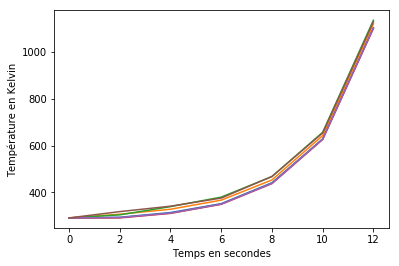

In [994]:
def plot_Temp(L1,L2):
    plt.figure()
    plt.plot(L1,L2)
    plt.xlabel("Temps en secondes")
    plt.ylabel("Température en Kelvin")
    plt.show()
    return

plot_Temp(L1,L2)

La courbe bleu correspond à l'alimentation,
La jaune à la carte graphique,
La verte au processeur,
La marron à la carte mère,
La rouge au disque dur,
La violette au barette de RAM

On remarque que si le pc est isolé, on obteint des valeurs beaucoup trop élevée mais logiques.
On va à présent améliorer le modèle en ventilant le pc.

Le programe est le même que celui vu précédément mais seul la température de l'air va varier et donc va maintenir les composants a températures correcte.

In [995]:
Dvent = 0.01747 # débit d'air explusé de lordinateur en m^3/s

tmax = 50

In [996]:


def temp_ordi(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, t) :
    """
    dict[str:Number]^6*Number^6 -> tuple[tuple[dict[str:Number],dict[str:Number]],tuple[dict[str:number],Number]]
    rend la température des composants, des dissipateurs, de l'air expulsé et de l'air des ventilateur à un instant t
    """
    
    P = {"a":np.random.randint(80, 100 + 1),
     "c":np.random.randint(75, 95 + 1),
     "p":np.random.randint(45, 60 + 1),
     "d":np.random.randint(8, 15 + 1),
     "r":1,
     "cm":np.random.randint(20, 35 + 1)} # puissance apportés aux composants en W
    
    if t == 0 :
        return (({"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}, {"p":Tamb,
            "a":Tamb,
            "c":Tamb}),({"p":Tamb,
            "a":Tamb,
            "c":Tamb},Tamb))
    else :
        Keys = ["d", "r", "cm"]
        
        Tair = Tamb
        
        Texp = Tamb
        
        T0 = Tamb
        
        s = 0
        
        hcomp_air = {"d":0,
            "r":0,
            "cm":0}
        
        hcomp_dis = {"p":0,
            "a":0,
            "c":0}
        
        Tdis = {"p":Tamb,
            "a":Tamb,
            "c":Tamb}
        
        Tcomp = {"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}
        
        Tvent = {"p":Tamb,
            "a":Tamb,
            "c":Tamb}
        
        chaleur = {"p":0,
            "a":0,
            "c":0}
        
        Tfalu = {"p":math.exp(-((60/C["p"])+(Tvent["p"]/(Ralu*C["p"])))*90)*(-60*Ralu-Tvent["p"])+60*Ralu+Tvent["p"],
        "a":math.exp(-((100/C["a"])+(Tvent["a"]/(Ralu*C["a"])))*90)*(-100*Ralu-Tvent["a"])+100*Ralu+Tvent["a"],
        "c":math.exp(-((90/C["c"])+(Tvent["c"]/(Ralu*C["c"])))*90)*(-95*Ralu-Tvent["c"])+95*Ralu+Tvent["c"]}
        
        hdis_vent = {"p":0,
            "a":0,
            "c":0}
        
        hvent_dis = {"p":0,
            "a":0,
            "c":0}
        
        Pdis = {"p":0,
            "a":0,
            "c":0}
        
        for i in range(1,t+1,2) :
            for j in Keys :
                Tcomp[j] = math.exp(-((P[j]/C[j])+(Tair/(Rair*C[j])))*i)*(-P[j]*Rair)+P[j]*Rair+Tair
            for k in Scomp_dis :
                if (Tcomp[k] <= Tfalu[k]) and (Tdis[k] != Tcomp[k]) or (Tcomp[k] == Tdis[k] == Tamb) :
                    Tcomp[k] = math.exp(-((P[k]/C[k])+(Tair/(Ralu*C[k])))*i)*(-P[k]*Ralu)+P[k]*Ralu+Tair
                    
                    hcomp_dis[k] = (math.fabs(Tfalu[k]-Tamb)*Cpalu*Malu[k])/(Scomp_dis[k]*math.fabs(Tdis[k]-Tcomp[k])*2)
                    
                    Tdis[k] = math.exp((-hcomp_dis[k]*Scomp_dis[k]*i)/(Malu[k]*Cpalu))*(Tamb-Tcomp[k])+Tcomp[k]
                    
                    hdis_vent[k] = (math.fabs(Tfalu[k]-Tamb)*Cpair*Mvent[k])/(Sdis_vent[k]*math.fabs(Tair-Tdis[k])*2)
                    
                    Tvent[k] = math.exp((-hdis_vent[k]*Sdis_vent[k]*i)/(Mvent[k]*Cpair))*(Tamb-Tdis[k])+Tdis[k]
                    
                    chaleur[k] = Mvent[k]*Cpair*math.fabs(Tair-Tvent[k])
                    
                    Tdis[k] = Tdis[k] - chaleur[k]/(Malu[k]*Cpalu)
                                        
                else :
                    Tcomp[k] = Tfalu[k]
                        
                    Tdis[k] = Tcomp[k]
                        
                    Tvent[k] = Tdis[k]
                    
                    
            Tfalu = {"p":math.exp(-((60/C["p"])+(Tair/(Ralu*C["p"])))*90)*(-60*Ralu-Tair)+60*Ralu+Tair,
                    "a":math.exp(-((100/C["a"])+(Tair/(Ralu*C["a"])))*90)*(-100*Ralu-Tair)+100*Ralu+Tair,
                    "c":math.exp(-((90/C["c"])+(Tair/(Ralu*C["c"])))*90)*(-95*Ralu-Tair)+95*Ralu+Tair}
            
        hcomp_air[j] = (math.fabs(Tf-Tamb)*Cpair*Mair)/(S[j]*math.fabs(T0-T[j])*2)
        s = math.exp((-hcomp_air["d"]*Scomp_air["d"]*t)/(Mair*Cpair))*(Tamb-Tcomp["d"])+Tcomp["d"] + math.exp((-hcomp_air["r"]*Scomp_air["r"]*t)/(Mair*Cpair))*(Tamb-Tcomp["r"])+Tcomp["r"] + math.exp((-hcomp_air["cm"]*Scomp_air["cm"]*t)/(Mair*Cpair))*(Tamb-Tcomp["cm"])+Tcomp["cm"]
        T0 = s/len(Scomp_air)
        Tair = Tamb
        Texp = ((((2*Vair-7.41*10**(-3)*2-9.91*10**(-3)*2-8.64*10**(-3)*2)*T0+7.41*10**(-3)*2*Tvent["p"]+9.91*10**(-3)*2*Tvent["a"]+8.64*10**(-3)*2*Tvent["c"]))+(Dvent*2-Vair*2)*Tamb)/(2*Dvent)
        
            
    return ((Tcomp, Tdis), (Tvent,Texp))


In [997]:
temp_ordi(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, 105)

(({'a': 320.2,
   'c': 323.0,
   'cm': 293.46,
   'd': 292.58,
   'p': 311.79999999999995,
   'r': 291.26},
  {'a': 314.1212239741446, 'c': 314.0074347826087, 'p': 308.9998151086956}),
 ({'a': 320.2, 'c': 323.0, 'p': 311.79999999999995}, 350.2105678305667))

In [998]:
def temp_comp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
    """
    dict[str:Number]^6*Number^6 -> list[tuple[Number,disct[str:Number]]]
    rend la température des composants pour tout instants.
    """
    T0 = []
    for i in range(0,tmax+1,2):
        a,b = temp_ordi(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, i)
        c,d = a
        e,f = b
        T0.append((i,c))
    return T0

In [999]:
def list_temps3(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax):
    """
    """
    L = []
    for i in temp_comp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T3(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax):
    """
    """
    L = []
    for i in temp_comp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
        a,b = i
        L0 = []
        for j in b :
            L0.append(b[j])
        L.append(L0)
    return L
L1 = list_temps3(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax)
L2 = list_T3(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax)

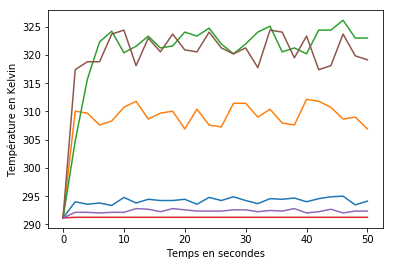

In [1000]:
def plot_Temp_comp(L1,L2):
    plt.figure()
    plt.plot(L1,L2)
    plt.xlabel("Temps en secondes")
    plt.ylabel("Température en Kelvin")
    plt.show()
    return

plot_Temp_comp(L1,L2)

In [1001]:
def temp_exp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
    """
    dict[str:Number]^6*Number^6 -> list[tuple[Number,Number]]
    rend la température expulsé du pc pour tout instants.
    """
    T0 = []
    for i in range(0,tmax+1,2):
        a,b = temp_ordi(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, i)
        c,d = a
        e,f = b
        T0.append((i,f))
    return T0

In [1002]:
def list_temps4(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax):
    """
    """
    L = []
    for i in temp_exp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T4(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax):
    """
    """
    L = []
    for i in temp_exp_final_tout_instant(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax) :
        a,b = i
        L.append(b)
    return L
L1 = list_temps4(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax)
L2 = list_T4(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, tmax)

In [1003]:
L2[15]

349.77047366393276

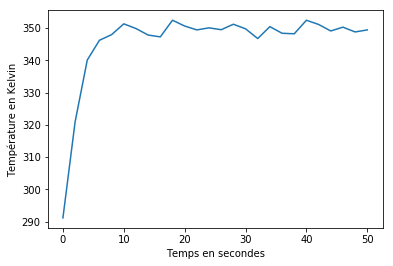

In [1004]:
def plot_Temp_exp(L1,L2):
    plt.figure()
    plt.plot(L1,L2)
    plt.xlabel("Temps en secondes")
    plt.ylabel("Température en Kelvin")
    plt.show()
    return

plot_Temp_comp(L1,L2)

 Pour calculer la tepérature de l'air correspondant à la case possédant l'ordinateur, nous devont utiliser deux formules : la formule de convection (Tfcv) et celle de l'homogénéisation de la température dans l'air (TF).

In [1005]:
def tcv2(t) :
    """
    """
    a,b = temp_ordi(Scomp_dis, Scomp_air, Sdis_vent, Mvent, Malu, C, Ralu, Rair, Vair, Tamb, Cpalu, Dvent, t)
    c,d = b
    return d - 273.15

tcv2(10)

75.58410564648028

In [1006]:
def T_air_ordi(t, Tamb):
    """  Float^2 -> Float
    rend la température du volume d'air possedant un ordinateur
    """
    VI = 1
    dt = 2
    Vi = VI - 0.024
    
    TF = Tamb
    for i in range(0, t+1,dt) :
        TF = ((0.017)*tcv2(i)+((Vi-0.017)*TF))/Vi
    return TF


T_air_ordi(20, 18)

26.800678760296254

Le prochain programme nous permet de calculer la température de l'air d'une case après homogénéisation de la température avec une case adjacente.

In [1007]:
def T_new_case(Tcase1, Tcase2):
    """ Float*Float -> Float
    rend température air d'une case après tranfert de température
    """
    
    C = 1.005
    VI = 1
    M1 = (1.292*(273.15/Tcase1 + 273.15))*VI
    Ma = (1.292*(273.15/Tcase2 + 273.15))*VI
    dt = 30
    
    Tf = (math.exp((-dt)/(C*M1))/(C*M1))+Tcase1
    
    TF = (Ma*Tcase2+M1*Tf)/(Ma+M1)
    
    return TF

T1 = T_air_ordi(20, 18)
T2 = 18

T_new_case(T1, T2)

22.345033145099702

Ici, ce programme nous rend la matrice sans ventilation

In [1008]:
def modèle(T_air_ordi, Tamb):
    """Float*Float -> matrix
    rend la température de chaque case après propagation dans la salle
    """
   
    MS = { 10:Tamb, 11:Tamb, 12:Tamb, 13:Tamb, 14:Tamb, 15:Tamb, 16:Tamb, 17:Tamb, 18:Tamb, 19:Tamb,
           20:Tamb, 21:Tamb, 22:Tamb, 23:Tamb, 24:Tamb, 25:Tamb, 26:Tamb, 27:Tamb, 28:Tamb, 29:Tamb,
           30:Tamb, 31:Tamb, 32:Tamb, 33:Tamb, 34:Tamb, 35:Tamb, 36:Tamb, 37:Tamb, 38:Tamb, 39:Tamb,
           40:Tamb, 41:Tamb, 42:Tamb, 43:Tamb, 44:Tamb, 45:Tamb, 46:Tamb, 47:Tamb, 48:Tamb, 49:Tamb,
           50:Tamb, 51:Tamb, 52:Tamb, 53:Tamb, 54:Tamb, 55:Tamb, 56:Tamb, 57:Tamb, 58:Tamb, 59:Tamb}
    
    A = [21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48]
    B = [20, 30, 40]
    C = [11, 12, 13, 14, 15, 16, 17, 18]
    D = [29, 39, 49]
    E = [51, 52, 53, 54, 55, 56, 57, 58]
    F = [10, 11, 12, 13, 20, 21, 22, 23, 30, 31, 32, 33, 40, 41, 42, 43, 51, 50, 52, 53]
    
    
    MS[34] = 0
    for j in range (10, 60) :
        if MS[j] == 0 :
            MS[34] = T_air_ordi
            
            i = j
            while i < 60  and i >9 :
                
                if i in A :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in B :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in C :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in D :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in E :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 10 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                elif i == 19 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 59 :
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i == 50 :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                i = i + 10
                
            i = j - 10
            while i < 60  and i >9 :
                
                if i in A :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in B :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in C :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in D :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in E :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 10 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                elif i == 19 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 59 :
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i == 50 :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                i = i - 10
                
            i = j + 1
            while i < 60  and i >9 :
                if i in F :
                    i = i 
                elif i in A :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in B :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in C :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in D :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in E :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 10 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                elif i == 19 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 59 :
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i == 50 :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                i = i + 1
            i = j-1
            while i < 60  and i >9 :
                if i in A :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in B :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in C :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in D :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in E :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 10 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                elif i == 19 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 59 :
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i == 50 :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                i = i - 1
                
            i = j + 1
            while i < 60  and i >9 :
                if i in A :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in B :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in C :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i in D :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i in E :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 10 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                elif i == 19 :
                    if MS[i+10] == Tamb :
                        MS[i+10] = T_new_case(MS[i], MS[i+10])
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                elif i == 59 :
                    if MS[i-1] == Tamb :
                        MS[i-1] = T_new_case(MS[i], MS[i-1])
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                elif i == 50 :
                    if MS[i-10] == Tamb :
                        MS[i-10] = T_new_case(MS[i], MS[i-10])
                    if MS[i+1] == Tamb :
                        MS[i+1] = T_new_case(MS[i], MS[i+1])
                i = i + 1
            
                
    return np.matrix(
                [[MS[10], MS[11], MS[12], MS[13], MS[14], MS[15], MS[16], MS[17], MS[18], MS[19]],
                 [MS[20], MS[21], MS[22], MS[23], MS[24], MS[25], MS[26], MS[27], MS[28], MS[29]],
                 [MS[30], MS[31], MS[32], MS[33], MS[34], MS[35], MS[36], MS[37], MS[38], MS[39]],
                 [MS[40], MS[41], MS[42], MS[43], MS[44], MS[45], MS[46], MS[47], MS[48], MS[49]],
                 [MS[50], MS[51], MS[52], MS[53], MS[54], MS[55], MS[56], MS[57], MS[58], MS[59]]]
                )

In [1009]:
Tamb = 18

modèle(T_air_ordi(20, 18), Tamb)

matrix([[ 17.5248273 ,  17.04858741,  16.1005943 ,  14.22491921,
          10.58178538,  14.22491921,  16.1005943 ,  17.04858741,
          17.5248273 ,  17.76347621],
        [ 17.04858741,  16.1005943 ,  14.22491921,  10.58178538,
          -2.49396208,  10.58178538,  14.22491921,  16.1005943 ,
          17.04858741,  17.5248273 ],
        [ 16.1005943 ,  14.22491921,  10.58178538,  -2.49396208,
         -25.02941809,  -2.49396208,  10.58178538,  14.22491921,
          16.1005943 ,  17.04858741],
        [ 17.04858741,  16.1005943 ,  14.22491921,  10.58178538,
          -2.49396208,  10.58178538,  14.22491921,  16.1005943 ,
          17.04858741,  17.5248273 ],
        [ 17.5248273 ,  17.04858741,  16.1005943 ,  14.22491921,
          10.58178538,  14.22491921,  16.1005943 ,  17.04858741,
          17.5248273 ,  17.76347621]])

In [1010]:

import matplotlib as mpl

MS = modèle(T_air_ordi(20, 18), Tamb)

def Matrice(MS):
    s=10
    liste1=[]
    liste2=[]
    liste3=[]
    liste4=[]
    liste5=[]
    print(MS)
    for i in range(10,60):
        if i <20:
            MS[i]=MS[i]
            liste1.append(MS[i])
        if i>=20 and i<30:
            MS[i]=MS[i]
            liste2.append(MS[i])
            MS[i]=MS[i]
        if i>=30 and i<40:
            MS[i]=MS[i]
            liste3.append(MS[i])
        if i>=40 and i<50:
            MS[i]=MS[i]
            liste4.append(MS[i])
        if i>=50 and i<60:
            MS[i]=MS[i]
            liste5.append(MS[i])
    print("")
    print(MS)
    Matrice=[]
    Matrice.append(liste1)
    Matrice.append(liste2)
    Matrice.append(liste3)
    Matrice.append(liste4)
    Matrice.append(liste5)
    print("")
    print(Matrice)
    return(Matrice)
    


methods = [None, 'none', 'lanczos']

grid = Matrice(MS)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(80, 40),
                        subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axs.flat, methods):
    
    ax.imshow(grid, interpolation=interp_method, cmap="plasma", norm = mpl.colors.Normalize(vmin=20.,vmax=60))
    ax.set_title(str(interp_method))


plt.tight_layout()
plt.show()

[[ 17.52118866  17.04133209  16.08617848  14.19653429  10.52765432
   14.19653429  16.08617848  17.04133209  17.52118866  17.76165424]
 [ 17.04133209  16.08617848  14.19653429  10.52765432  -2.52750641
   10.52765432  14.19653429  16.08617848  17.04133209  17.52118866]
 [ 16.08617848  14.19653429  10.52765432  -2.52750641 -25.09730328
   -2.52750641  10.52765432  14.19653429  16.08617848  17.04133209]
 [ 17.04133209  16.08617848  14.19653429  10.52765432  -2.52750641
   10.52765432  14.19653429  16.08617848  17.04133209  17.52118866]
 [ 17.52118866  17.04133209  16.08617848  14.19653429  10.52765432
   14.19653429  16.08617848  17.04133209  17.52118866  17.76165424]]


IndexError: index 10 is out of bounds for axis 0 with size 5